In [ ]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
import matplotlib
import matplotlib.pyplot as pltx
warnings.filterwarnings("ignore")

In [ ]:
from scipy.io import wavfile
samplerate, data = wavfile.read('/content/Recording.wav')

In [ ]:
print(samplerate)

48000


In [ ]:
print(len(data))
print(data)

395264
[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [ 3  3]
 [ 3  3]
 [-1 -1]]


# Data ploting

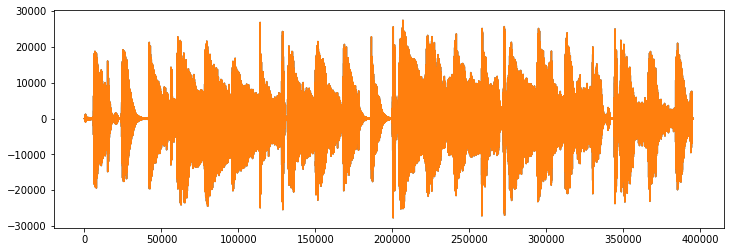

In [ ]:
#plot data
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()


In [ ]:
TimeBerSec=len(data)/samplerate
TimeBerSec

8.234666666666667

# Framing

In [ ]:
def Framing (frame_size_MSec ,samplerate, data ):
  NumOfSamples=len(data)
  frame_size=int(frame_size_MSec/1000 * samplerate)
 
  frames = []
  for i in range(0, NumOfSamples, frame_size):
      frames.append(data[i:i+frame_size])

  last_frame_frames=len(frames)-1
  if  len(frames[last_frame_frames]) < frame_size:
    s_frames = (frame_size-len(frames[last_frame_frames]),2)
    z_frames = np.zeros(s_frames)
      
    Z_P_frames=np.concatenate((frames[last_frame_frames], z_frames))

    frames[last_frame_frames]=Z_P_frames
  return  frames

In [ ]:
framing_data=Framing (20 ,samplerate , data )
len(framing_data)

412

# Overlab

In [ ]:
def Overlapping (Overlap_Msec,frame_size_MSec,samplerate,data):
  frame_size=int(frame_size_MSec/1000 * samplerate)
  Overlab_size=int(Overlap_Msec/1000 * samplerate)
  Overlabing_Frames= []

  for i in range(Overlab_size, len(data), int(frame_size-Overlab_size)):
      if i == 0 :
        Overlabing_Frames.append(data[i:(i+frame_size)])
      else:
        Overlabing_Frames.append(data[i-Overlab_size:(i+frame_size)-Overlab_size])
      

  last_frame=len(Overlabing_Frames)-1
  if  len(Overlabing_Frames[last_frame]) < frame_size:
    s = (frame_size-len(Overlabing_Frames[last_frame]),2)
    z = np.zeros(s)
    
    x=np.concatenate((Overlabing_Frames[last_frame], z))

    Overlabing_Frames[last_frame]=x
  return  Overlabing_Frames  

In [ ]:
Overlapping_data=Overlapping (10,20,samplerate,data)
len(Overlapping_data)

823

# plot Frames VS Overlabing_Frames

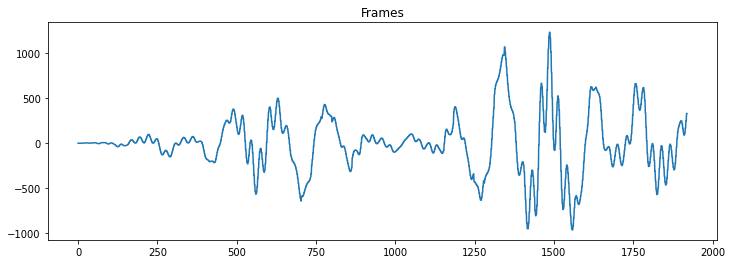

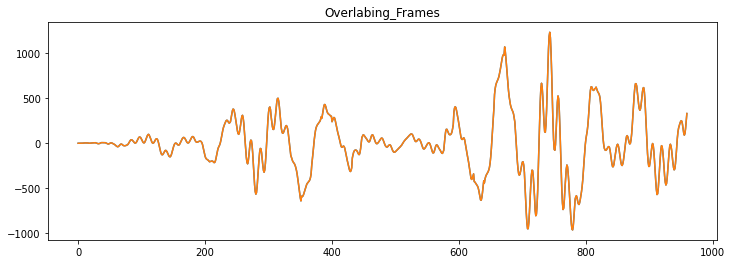

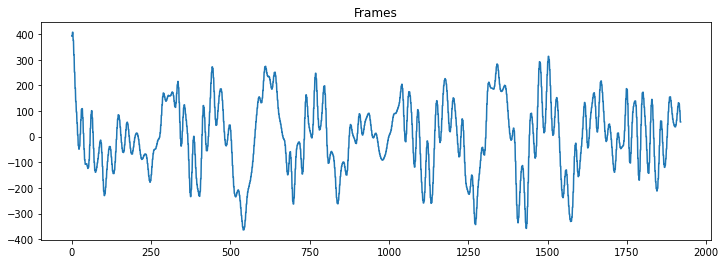

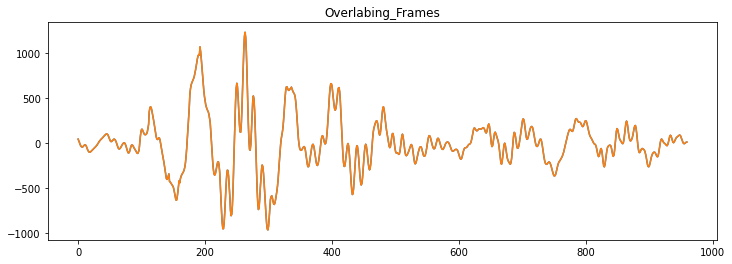

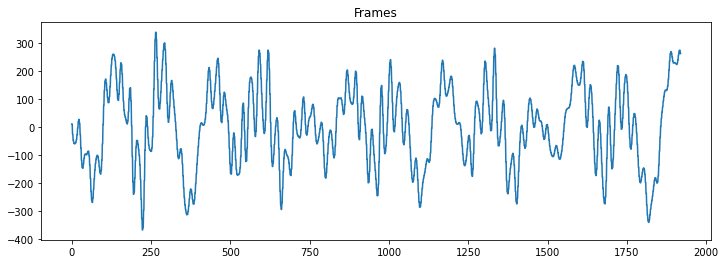

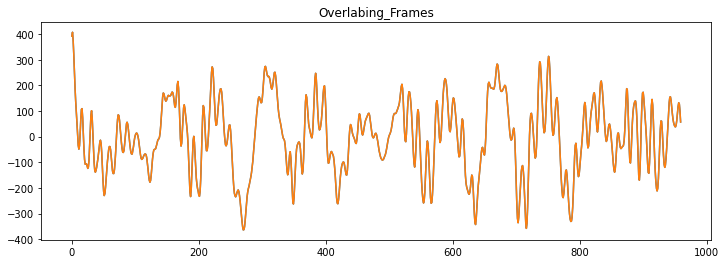

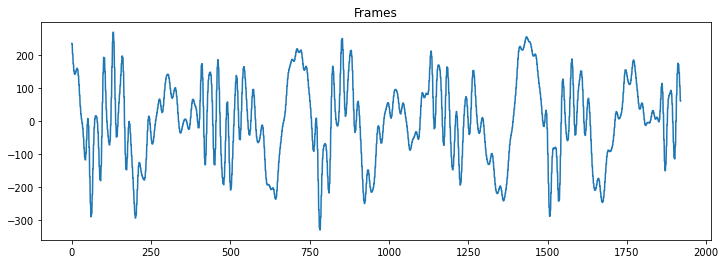

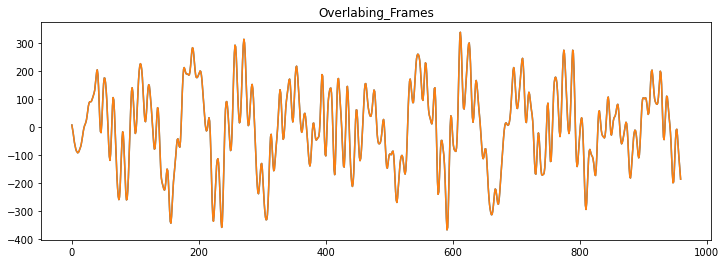

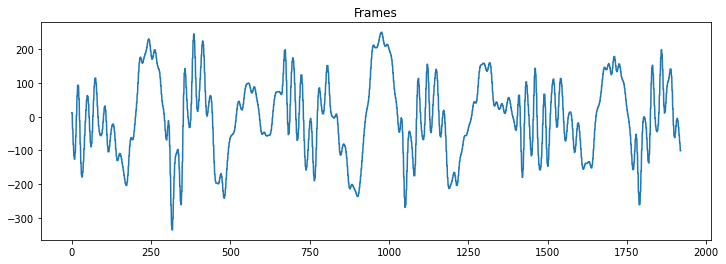

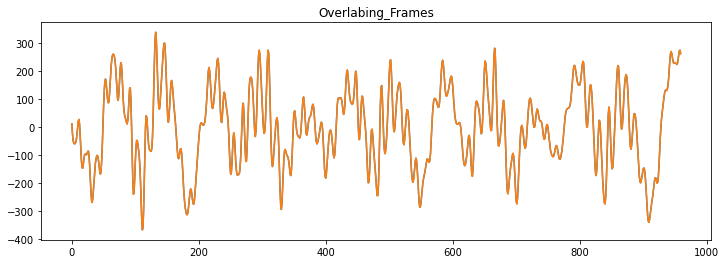

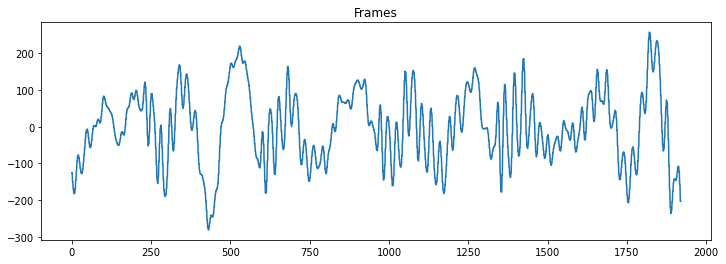

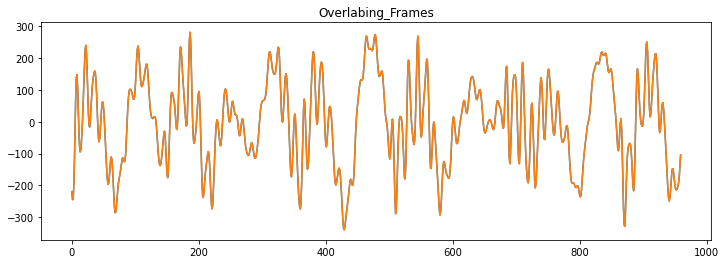

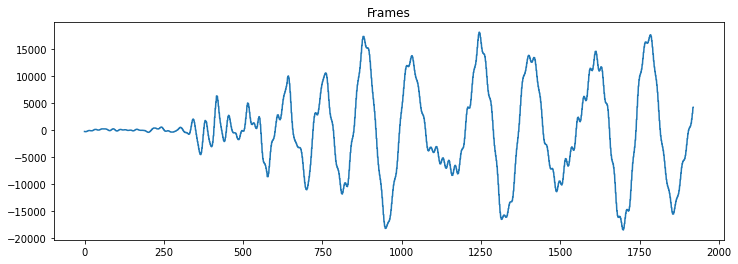

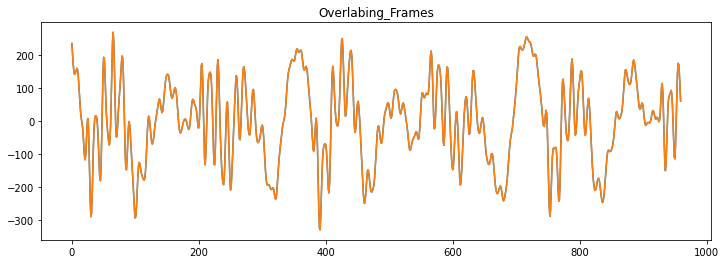

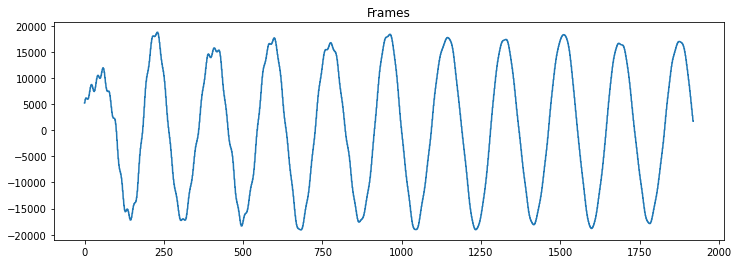

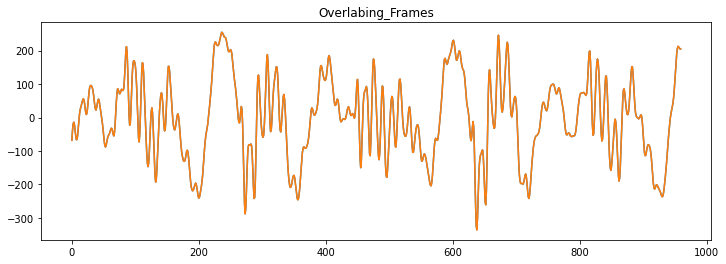

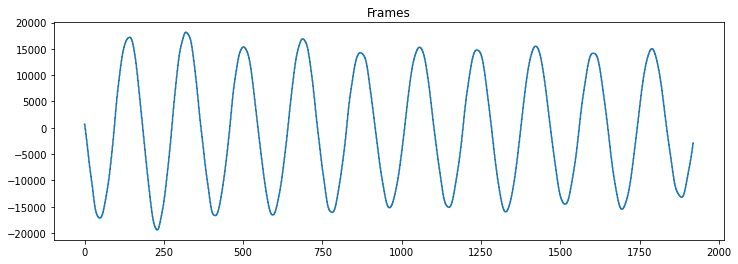

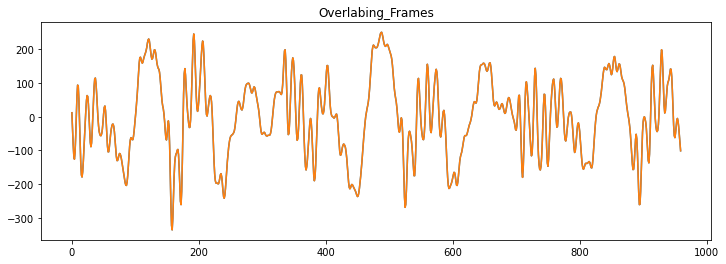

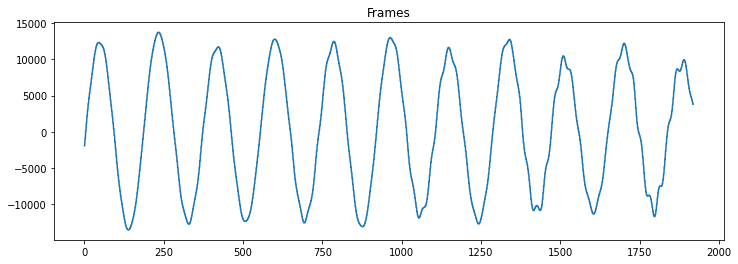

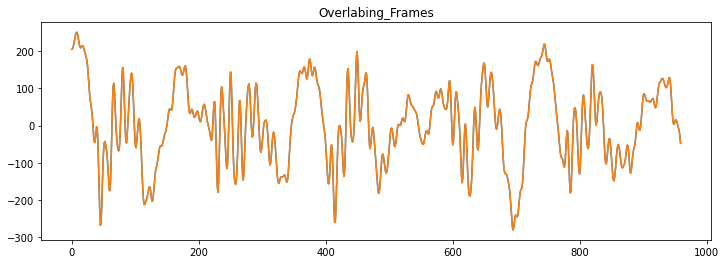

In [ ]:
for i in range(10):

  #plot Frames
  
  fig = plt.figure(figsize=(12,4))
  s = fig.add_subplot(111)
  amplitude = np.fromstring(framing_data[i], np.int16)
  s.plot(amplitude)
  fig.savefig('t.png')
  plt.title("Frames")
  plt.show()

    #plot Overlabing_Frames

  plt.figure(figsize=(12,4))
  plt.plot(Overlapping_data[i])
  plt.title("Overlabing_Frames")
  plt.show()

# plot after concatenation

In [ ]:

conc_framing_data=np.concatenate(framing_data)
conc_Overlapping_data=np.concatenate(Overlapping_data)

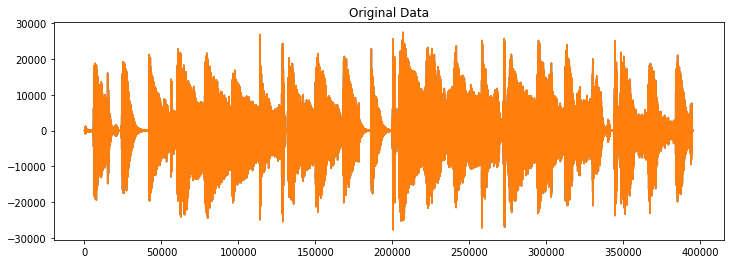

In [ ]:
#plot data
plt.figure(figsize=(12,4))
plt.plot(data)
plt.title("Original Data")
plt.show()

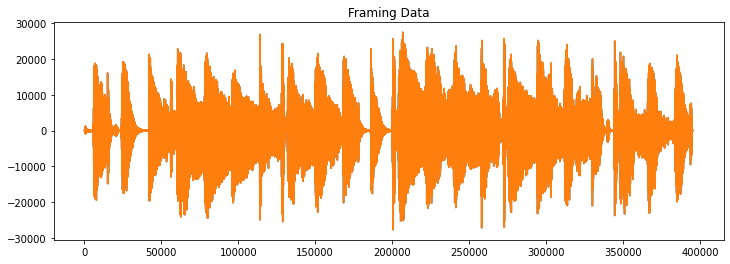

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(conc_framing_data)
plt.title("Framing Data")
plt.show()

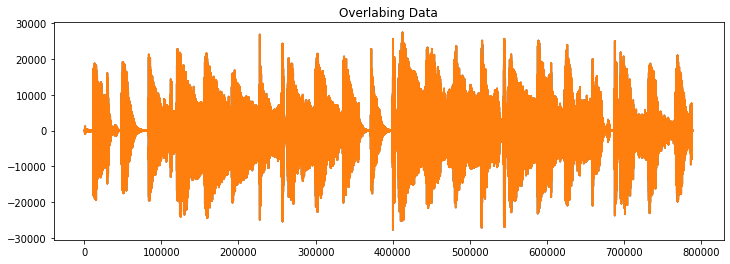

In [ ]:
  plt.figure(figsize=(12,4))
  plt.plot(conc_Overlapping_data)
  plt.title("Overlabing Data")
  plt.show()

In [ ]:
print(len(framing_data))

412


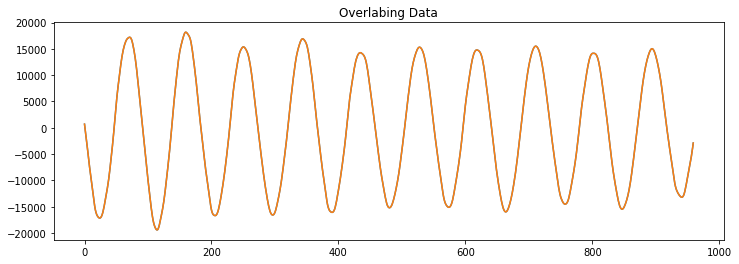

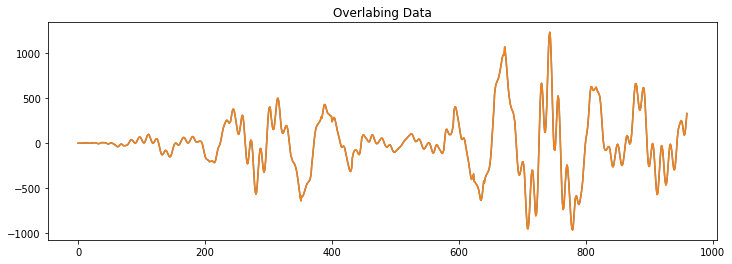

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(framing_data[8])
plt.title("Overlabing Data")
plt.show()


plt.figure(figsize=(12,4))
plt.plot(framing_data[0])
plt.title("Overlabing Data")
plt.show()

In [ ]:
def energy ( data):

  data_np = np.array(data)

  first_column=[]
  for i in range(len(data)):
    first_column.append(data_np[i][:,0])
  
  energy=[]
  for i in range(len(data)):
    energy.append(sum(first_column[i]**2))
  return energy

In [ ]:
print(energy(framing_data))
print(len(energy(framing_data)))

[97694456.0, 18703106.0, 18574732.0, 14745733.0, 13110310.0, 9367997.0, 60558075287.0, 147342079042.0, 121443846855.0, 69398377080.0, 41968635325.0, 46814831020.0, 29455537486.0, 19673670619.0, 25389701591.0, 28900469351.0, 23737887682.0, 5409165355.0, 887727253.0, 131987297.0, 262969270.0, 451419075.0, 186929933.0, 8761263.0, 8717504.0, 45594543676.0, 124036394316.0, 88101671723.0, 73656973639.0, 46725600103.0, 24901946718.0, 14632167194.0, 6658566325.0, 3554361168.0, 1314065756.0, 372939529.0, 182643379.0, 60149271.0, 29255333.0, 10182179.0, 9823173.0, 5623778.0, 5058671.0, 27171598445.0, 84233626306.0, 95333874801.0, 68806502201.0, 56218220163.0, 48808522387.0, 36797627070.0, 28377616671.0, 23240340925.0, 15541974683.0, 7641829100.0, 11307858413.0, 9771217661.0, 6738623283.0, 4468627552.0, 17958066203.0, 17206202468.0, 4469865285.0, 3187578558.0, 21715323478.0, 81199941115.0, 65963654111.0, 71743846983.0, 53742649128.0, 49746008773.0, 46225179240.0, 36456736355.0, 32494751507.0, 281

In [ ]:
print(energy(Overlapping_data))
print(len(energy(Overlapping_data)))

[97694456.0, 87720040.0, 18703106.0, 18984609.0, 18574732.0, 17363618.0, 14745733.0, 13817377.0, 13110310.0, 11027096.0, 9367997.0, 15156700097.0, 60558075287.0, 114724071172.0, 147342079042.0, 145303082266.0, 121443846855.0, 92253031747.0, 69398377080.0, 55015780862.0, 41968635325.0, 41121922878.0, 46814831020.0, 42033348637.0, 29455537486.0, 19781908686.0, 19673670619.0, 26366736908.0, 25389701591.0, 14927952204.0, 28900469351.0, 40300976809.0, 23737887682.0, 11192528415.0, 5409165355.0, 2626083979.0, 887727253.0, 251017888.0, 131987297.0, 158935092.0, 262969270.0, 395049565.0, 451419075.0, 373749000.0, 186929933.0, 39812975.0, 8761263.0, 7521339.0, 8717504.0, 5688692494.0, 45594543676.0, 106981076323.0, 124036394316.0, 107217486459.0, 88101671723.0, 72296651456.0, 73656973639.0, 68326138977.0, 46725600103.0, 31398320533.0, 24901946718.0, 19878429070.0, 14632167194.0, 9748628373.0, 6658566325.0, 4761331965.0, 3554361168.0, 2448054459.0, 1314065756.0, 648885236.0, 372939529.0, 2636882

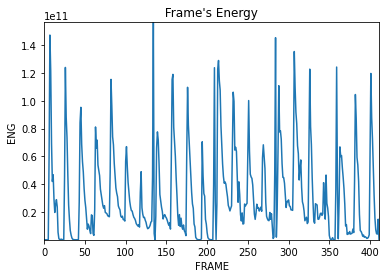

In [ ]:

plt.plot(energy(framing_data))
plt.title(" Frame's Energy ")
plt.ylabel('ENG')
plt.xlabel('FRAME')
pltx.autoscale(tight='both')

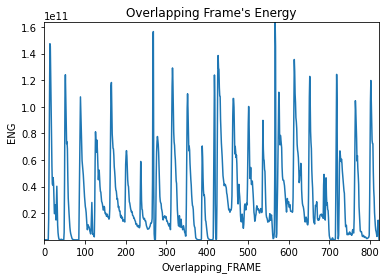

In [ ]:

plt.plot(energy(Overlapping_data))
plt.title("Overlapping Frame's Energy")
plt.ylabel('ENG')
plt.xlabel('Overlapping_FRAME')
pltx.autoscale(tight='both')

In [ ]:
def Zero_C_R (data):
  framing_data_np = np.array(data)
  first_column_1=[]
  for i in range(len(data)):
      first_column_1.append(framing_data_np[i][:,0])
  ZCR=[]
  for i in range(len(first_column_1)-1):
    x=0
    c=first_column_1[i] * first_column_1[i+1]
    for j in range(len(first_column_1[0])-1) :
      if first_column_1[i][j] > 0 and first_column_1[i][j+1] < 0:
        x=x+1
      if first_column_1[i][j] < 0 and first_column_1[i][j+1] > 0:
        x=x+1
    ZCR.append(x) 
  return ZCR

In [ ]:
print(Zero_C_R(framing_data))


[40, 70, 73, 76, 57, 69, 41, 20, 21, 21, 21, 23, 35, 31, 23, 33, 26, 21, 21, 29, 34, 61, 79, 86, 98, 34, 26, 27, 26, 26, 26, 26, 27, 26, 26, 27, 25, 28, 31, 36, 32, 60, 53, 63, 47, 28, 28, 28, 28, 28, 28, 28, 28, 28, 70, 96, 98, 104, 85, 75, 219, 254, 97, 52, 49, 70, 63, 76, 75, 87, 95, 114, 118, 113, 84, 103, 95, 104, 105, 102, 101, 64, 39, 38, 40, 43, 50, 56, 57, 60, 59, 76, 76, 71, 89, 86, 68, 79, 91, 80, 55, 39, 42, 33, 37, 34, 45, 56, 45, 44, 67, 53, 55, 56, 62, 65, 69, 74, 76, 103, 74, 74, 67, 48, 55, 49, 45, 50, 48, 51, 48, 42, 36, 32, 27, 31, 30, 88, 62, 35, 49, 47, 73, 73, 77, 82, 75, 67, 57, 96, 82, 77, 87, 76, 83, 87, 53, 28, 28, 31, 26, 30, 27, 26, 27, 38, 38, 35, 34, 35, 20, 16, 30, 18, 30, 43, 27, 28, 27, 28, 28, 28, 28, 28, 30, 46, 30, 28, 27, 27, 26, 26, 28, 71, 37, 33, 32, 31, 31, 32, 31, 31, 32, 30, 31, 31, 30, 32, 28, 23, 33, 35, 65, 34, 30, 52, 61, 68, 68, 72, 72, 74, 78, 64, 63, 76, 75, 91, 104, 109, 116, 56, 33, 34, 38, 55, 48, 50, 49, 55, 56, 53, 48, 58, 51, 57, 

In [ ]:
print(Zero_C_R(Overlapping_data))


[40, 52, 70, 71, 73, 81, 76, 62, 57, 55, 69, 74, 41, 21, 20, 21, 21, 21, 21, 21, 21, 23, 23, 25, 35, 39, 31, 22, 23, 30, 33, 30, 26, 21, 21, 21, 21, 25, 29, 33, 34, 51, 61, 62, 79, 83, 86, 92, 98, 73, 34, 26, 26, 26, 27, 27, 26, 26, 26, 27, 26, 26, 26, 26, 27, 27, 26, 26, 26, 26, 27, 27, 25, 25, 28, 34, 31, 28, 36, 36, 32, 47, 60, 53, 53, 58, 63, 67, 47, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 48, 70, 76, 96, 101, 98, 98, 104, 112, 85, 46, 75, 161, 219, 245, 254, 181, 97, 73, 52, 41, 49, 70, 70, 65, 63, 71, 76, 69, 75, 82, 87, 88, 95, 104, 114, 117, 118, 120, 113, 97, 84, 99, 103, 88, 95, 110, 104, 100, 105, 105, 102, 101, 101, 90, 64, 46, 39, 34, 38, 40, 40, 43, 43, 42, 50, 55, 56, 60, 57, 54, 60, 61, 59, 74, 76, 70, 76, 71, 71, 81, 89, 90, 86, 70, 68, 80, 79, 88, 91, 83, 80, 72, 55, 38, 39, 45, 42, 38, 33, 37, 37, 31, 34, 39, 45, 54, 56, 51, 45, 40, 44, 56, 67, 64, 53, 47, 55, 62, 56, 52, 62, 67, 65, 70, 69, 75, 74, 62, 76, 92, 103, 90, 74, 76, 74, 74,

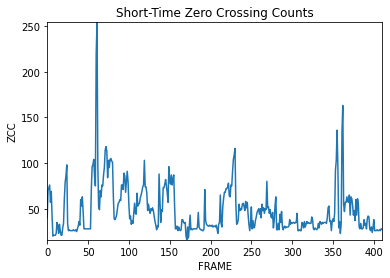

In [ ]:

plt.plot(Zero_C_R(framing_data))
plt.title('Short-Time Zero Crossing Counts')
plt.ylabel('ZCC')
plt.xlabel('FRAME')
pltx.autoscale(tight='both')



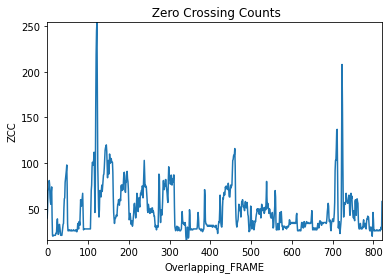

In [ ]:

plt.plot(Zero_C_R(Overlapping_data))
plt.title(' Zero Crossing Counts')
plt.ylabel('ZCC')
plt.xlabel('Overlapping_FRAME')
pltx.autoscale(tight='both')

In [ ]:
#  framing_data_np = np.array(framing_data)
#  first_column_1=[]
#  for i in range(len(framing_data)):
#     first_column_1.append(framing_data_np[i][:,0])


#  first_column_2=[]
#  for i in range(len(framing_data)):
#     first_column_2.append(framing_data_np[i][:,1]) 

# print(first_column_1[8] == first_column_2[8])   